In [1]:
from qiskit.circuit import QuantumRegister, Parameter
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator, SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient
import numpy as np
from qiskit.opflow import X, Y, I
from scipy.linalg import expm

C:\Users\madse\AppData\Local\Temp\ipykernel_17316\3493014345.py:7: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow import X, Y, I


In [2]:
simulator = Aer.get_backend('statevector_simulator')

In [3]:
theta_1, theta_2 = 0.2871, 1.6923

In [4]:
def U_1(theta: float):
    qc_1 = QuantumCircuit(1)
    qc_1.rx(theta=theta,qubit=0)
    return np.array(Operator(qc_1))

def U_2(theta: float):
    qc_2 = QuantumCircuit(1)
    qc_2.ry(theta=theta, qubit=0)
    return np.array(Operator(qc_2))

In [5]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
XX = np.array(Operator(qc))
qc = QuantumCircuit(2)
qc.y(0)
qc.y(1)
YY = np.array(Operator(qc))


C:\Users\madse\.python_venvs\QiskitStuff\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


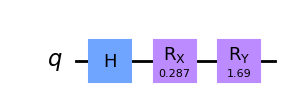

In [6]:
qc = QuantumCircuit(1)
result_0 = execute(qc, simulator).result()
psi_0 = np.array(result_0.get_statevector())

qc.h(qubit=0)
result_1 = execute(qc, simulator).result()
psi_1 = np.array(result_1.get_statevector())

qc.rx(theta=theta_1,qubit=0)
result_2 = execute(qc, simulator).result()
psi_2 = np.array(result_2.get_statevector())

qc.ry(theta=theta_2,qubit=0)
result_f = execute(qc, simulator).result()
psi_f = np.array(result_f.get_statevector())

qc.draw(output='mpl')

In [7]:
X_mat = np.array([[0,1],
                  [1,0]], dtype=np.complex128) 
Y_mat = np.array([[0,-1j],
                  [1j, 0]], dtype=np.complex128) 

In [8]:
O = 2*X_mat+Y_mat

In [9]:
# Parameter shift
deriv_theta_1 = 1/2*((psi_1.conj().T @ (U_1(theta_1 + np.pi/2).conj().T @ (O @ (U_1(theta_1 + np.pi/2) @ psi_1)))) - (psi_1.conj().T @ (U_1(theta_1 - np.pi/2).conj().T @ (O @ (U_1(theta_1 - np.pi/2) @ psi_1)))))

deriv_theta_2 = 1/2*((psi_2.conj().T @ (U_2(theta_2 + np.pi/2).conj().T @ (O @ (U_2(theta_2 + np.pi/2) @ psi_2)))) - (psi_2.conj().T @ (U_2(theta_2 - np.pi/2).conj().T @ (O @ (U_2(theta_2 - np.pi/2) @ psi_2)))))
my_derivs = np.array([deriv_theta_1, deriv_theta_2])

In [10]:
deriv_theta_1, deriv_theta_2

((2.220446049250313e-16-5.551115123125783e-17j),
 (-1.98525501099378+8.326672684688674e-17j))

In [11]:
#Instantiate the quantum circuit
a = Parameter('a')
b = Parameter('b')
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q)
qc.rx(a, q[0])
qc.ry(b, q[0])

#Instantiate the Hamiltonian observable 2X+Y
H = SparsePauliOp.from_list([('X', 2), ('Y',1)])

#Parameter list
params = [[theta_1, theta_2]]

In [12]:
#Define the estimator
estimator = Estimator()
#Define the gradient
gradient = ParamShiftEstimatorGradient(estimator)

# Evaluate the gradient of the circuits using parameter shift gradients
pse_grad_result = gradient.run(qc, H,  params).result().gradients


In [13]:
np.allclose(my_derivs,pse_grad_result)

True

In [15]:
#Instantiate the quantum circuit
N_QUBITS = 2
params = [Parameter(f'theta_{i}') for i in range(N_QUBITS-1)]

qc = QuantumCircuit(q)
qc.rxx(params[0], q[0])
qc.ryy(params[0], q[0])

#Instantiate the Hamiltonian observable 2X+Y
H = SparsePauliOp.from_list([('X', 2), ('Y',1)])

#Parameter list
params = [[theta_1, theta_2]]

#Define the estimator
estimator = Estimator()
#Define the gradient
gradient = ParamShiftEstimatorGradient(estimator)
# Evaluate the gradient of the circuits using parameter shift gradients
pse_grad_result = gradient.run(qc, H,  params).result().gradients


TypeError: QuantumCircuit.rxx() missing 1 required positional argument: 'qubit2'